Regresión lineal paso a paso con Python

Ejemplo extraido del siguiente Blog:
http://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

El siguiente ejemplo es sobre un archivo que
contiene URLs a articulos sobre Machine Learning
a partir de sus características intentaremos pronosticar
Cuantas veces será compartido en redes sociales


In [2]:
#Importamos las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
#Datos de entread
data = pd.read_csv(r"articulos_ml.csv")

#Veamos número de registros y variables
data.shape

(161, 8)

In [8]:
#Veamos los registros

data.head(10)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28.0,2,170,200000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
9,Artificial intelligence is going to completely...,NaN,1581,4,NaN,2,60,35000


In [9]:
#Estadisticas de las variables
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


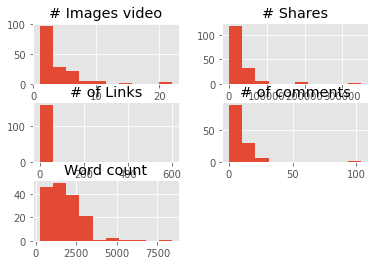

In [10]:
#Veamos como se distribuye cada variable

data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

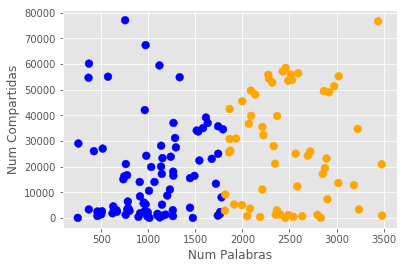

In [15]:
#Notemos que los datos se concentran 
#entre 0 y 3500 palabras por lo que tomaremos esos datos
#y los que tengan menos de 80k compartidos

filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <=80000)]

colores = ['orange', 'blue']
tamanios = [30, 60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

#Ahora pintaremos los datos por debajo y encima
#de la media de palabras

asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[1])
plt.xlabel("Num Palabras")
plt.ylabel("Num Compartidas")
plt.show()        

In [28]:
#Asignamos nuestros datos para el modelo

xtrain = np.array(filtered_data[['Word count']])
ytrain = filtered_data['# Shares'].values

#Objeto regresion lineal
reg = linear_model.LinearRegression()

#Entrenamos nuestro modelo
reg.fit(xtrain,ytrain)

#Hacemos pronosticos
ypron = reg.predict(xtrain)

#Veamos los coeficientes
print("Modelo : y = ",reg.coef_[0],"x + ",reg.intercept_)
print("Error cuadratico medio: {0:.2f}" .format(mean_squared_error(ytrain,ypron)))
print("Nuestro modelo explica {0:.2f}% de los datos" .format(r2_score(ytrain,ypron)*100))


Modelo : y =  5.697653657389774 x +  11200.303223074157
Error cuadratico medio: 372888728.34
Nuestro modelo explica 5.52% de los datos


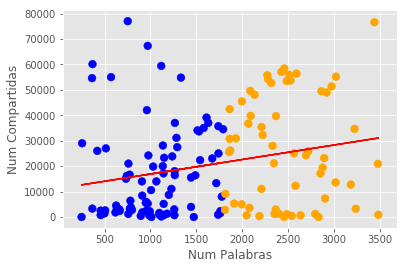

In [32]:
#Veamos como se ajusta a los datos la línea de Regresion

y=reg.coef_[0]*xtrain+reg.intercept_
plt.plot(xtrain,y,color = "red")
plt.scatter(f1,f2,c=asignar,s=tamanios[1])
plt.xlabel("Num Palabras")
plt.ylabel("Num Compartidas")
plt.show()        


In [35]:
#Hagamos el modelo con una regresión de 2 variables

#Creemos una nueva variable
suma = (filtered_data["# of Links"] + filtered_data["# of comments"].fillna(0) + filtered_data["# Images video"])

datax2 = pd.DataFrame()
datax2["Word count"] = filtered_data["Word count"]
datax2["suma"] = suma
xytrain = np.array(datax2)
ztrain = filtered_data["# Shares"].values

In [39]:
#Creamos un nuevo objeto de regresion lineal
reg2=linear_model.LinearRegression()

reg2.fit(xytrain,ztrain)

zpred = reg2.predict(xytrain)

#Veamos los coeficientes
print("Modelo : Y = ",reg2.coef_[0],"X0 + ",reg2.coef_[1],"X1 + ",reg2.intercept_)
print("Error cuadratico medio: {0:.2f}" .format(mean_squared_error(ztrain,zpred)))
print("Nuestro modelo explica {0:.2f}% de los datos" .format(r2_score(ztrain,zpred)*100))


Modelo : Y =  6.632163239889608 X0 +  -483.40753768629384 X1 +  16921.891098343356
Error cuadratico medio: 352122816.48
Nuestro modelo explica 10.78% de los datos


Text(0.5,0.92,'Regresión Lineal Multiple')

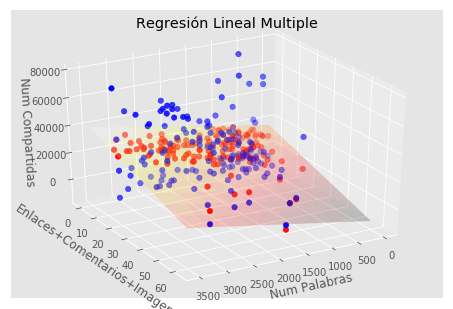

In [49]:
fig = plt.figure()
ax = Axes3D(fig)

#Creamos la malla para graficar el plano
xx, yy = np.meshgrid(np.linspace(0,3500,num=10),np.linspace(0,60,num=10))

#Calculamos los valores del plano para x y
nx = (reg2.coef_[0]*xx)
ny = (reg2.coef_[1]*yy)

#Calculamos valores de z
nz = (nx + ny + reg2.intercept_)

#Graficando el plano
ax.plot_surface(xx,yy,nz,alpha=0.2,cmap="hot")

#Grafiquemos en azul los puntos en 3d
ax.scatter(xytrain[:,0],xytrain[:,1],ztrain,c="blue",s=30)
#Rojo los puntos pronosticados
ax.scatter(xytrain[:,0],xytrain[:,1],zpred,c="red",s=30)
#Para situar la "camara" con la que visualizamos
ax.view_init(elev=30.,azim=60)

ax.set_xlabel("Num Palabras")
ax.set_ylabel("Enlaces+Comentarios+Imagenes")
ax.set_zlabel("Num Compartidas")
ax.set_title("Regresión Lineal Multiple")